The dataset provided consists of information related to various crops grown in different states. It includes data on the cost of cultivation (A2+FL and C2) per hectare, cost of production (C2) per quintal, and yield (quintal/hectare) for each crop. The crops listed in the dataset include ARHAR, COTTON, GRAM, GROUNDNUT, MAIZE, MOONG, PADDY, RAPESEED AND MUSTARD, SUGARCANE, and WHEAT. The dataset allows for analysis of the costs and yields associated with different crops across various states, enabling comparisons, trend identification, and insights into agricultural economics. The dataset can be used for further exploration, visualization, and decision-making in the field of agriculture and crop planning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/datafile (1) (1).csv")

In [7]:
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
df.shape

(49, 6)

In [10]:
df.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [5]:
df.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

## **1.average cost of cultivation for the crop across all states.**

The average cost of cultivation for the crop across all states is: 20363.54


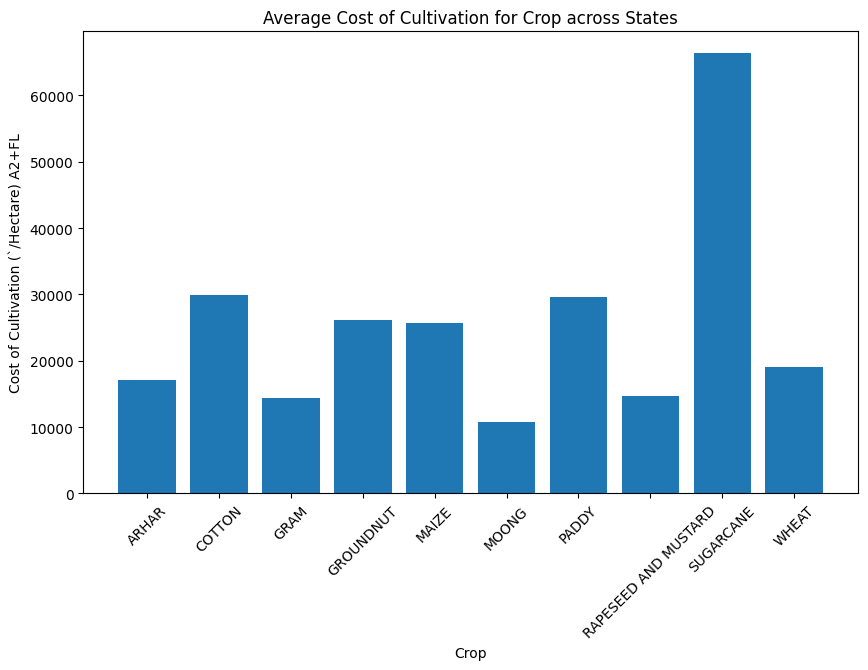

In [12]:
# Calculate the average cost of cultivation across all crops and states
average_cost = df['Cost of Cultivation (`/Hectare) A2+FL'].mean()

print(f"The average cost of cultivation for the crop across all states is: {average_cost:.2f}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df['Crop'], df['Cost of Cultivation (`/Hectare) A2+FL'])
plt.xlabel('Crop')
plt.ylabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.title('Average Cost of Cultivation for Crop across States')
plt.xticks(rotation=45)
plt.show()

## **2.Which crop has the highest cost of cultivation (A2+FL) in a specific state?**

<ipython-input-15-0300dfee2f38>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  highest_cost_crop_state = df.groupby('State')['Crop', 'Cost of Cultivation (`/Hectare) A2+FL'].max()


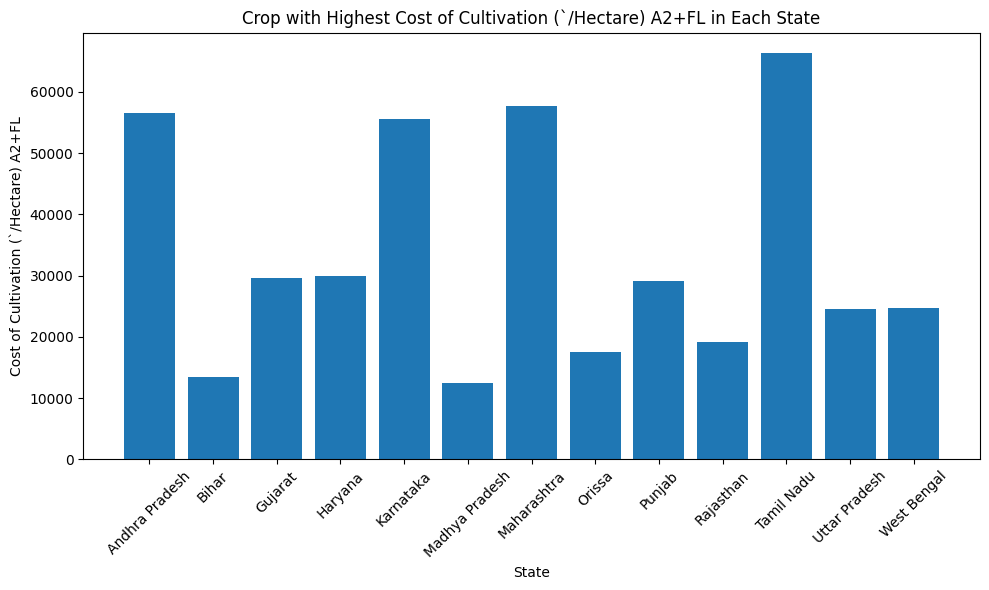

In [15]:
# Find the crop with the highest cost of cultivation (A2+FL) in a specific state
highest_cost_crop_state = df.groupby('State')['Crop', 'Cost of Cultivation (`/Hectare) A2+FL'].max()

# Reset the index to access the state and cost as separate columns
highest_cost_crop_state = highest_cost_crop_state.reset_index()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(highest_cost_crop_state['State'], highest_cost_crop_state['Cost of Cultivation (`/Hectare) A2+FL'])
plt.xlabel('State')
plt.ylabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.title('Crop with Highest Cost of Cultivation (`/Hectare) A2+FL in Each State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3.Among the crops listed, which state has the highest average cost of cultivation (C2)?**

The state with the highest average cost of cultivation (C2) among the listed crops is Tamil Nadu with an average cost of 59709.47


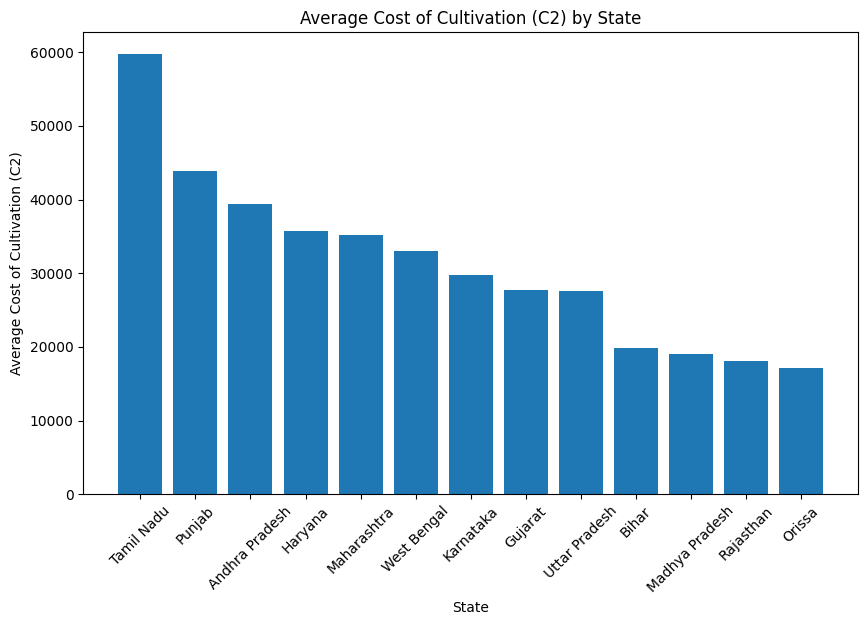

In [17]:
# Calculate the average cost of cultivation (C2) for each state
average_cost_by_state = df.groupby('State')['Cost of Cultivation (`/Hectare) C2'].mean().sort_values(ascending=False)

# Extract the state with the highest average cost of cultivation
highest_cost_state = average_cost_by_state.index[0]
highest_cost = average_cost_by_state[0]

print(f"The state with the highest average cost of cultivation (C2) among the listed crops is {highest_cost_state} with an average cost of {highest_cost:.2f}")

# Visualize the average cost of cultivation by state
plt.figure(figsize=(10, 6))
plt.bar(average_cost_by_state.index, average_cost_by_state.values)
plt.xlabel('State')
plt.ylabel('Average Cost of Cultivation (C2)')
plt.title('Average Cost of Cultivation (C2) by State')
plt.xticks(rotation=45)
plt.show()

## **4.Compare the cost of cultivation (C2) for the crop 'COTTON' across different states. Which state has the highest and lowest cost of cultivation for this crop?**

The state with the highest cost of cultivation for 'COTTON' is: Andhra Pradesh
The state with the lowest cost of cultivation for 'COTTON' is: Karnataka


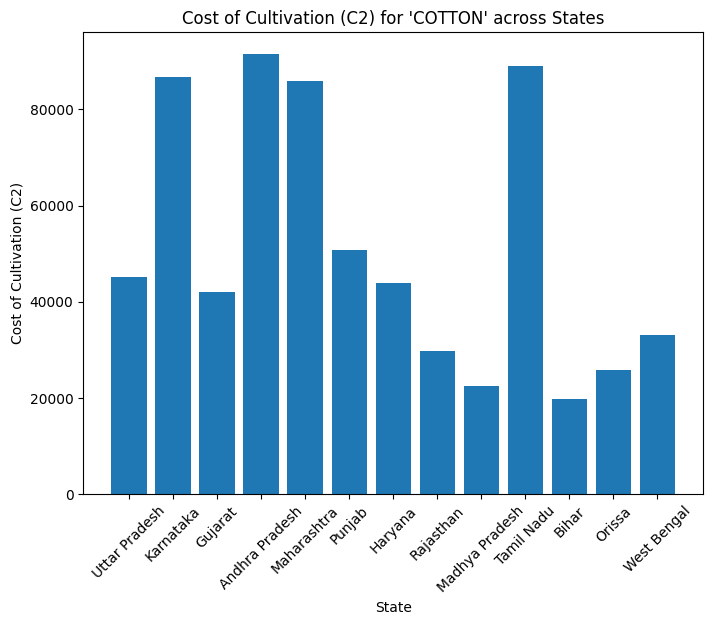

In [19]:
# Find the state with the highest and lowest cost of cultivation for 'COTTON'
highest_cost_state = df.loc[df['Cost of Cultivation (`/Hectare) C2'].idxmax(), 'State']
lowest_cost_state = df.loc[df['Cost of Cultivation (`/Hectare) C2'].idxmin(), 'State']

print(f"The state with the highest cost of cultivation for 'COTTON' is: {highest_cost_state}")
print(f"The state with the lowest cost of cultivation for 'COTTON' is: {lowest_cost_state}")

# Visualize the data
plt.figure(figsize=(8, 6))
plt.bar(df['State'], df['Cost of Cultivation (`/Hectare) C2'])
plt.xlabel('State')
plt.ylabel('Cost of Cultivation (C2)')
plt.title("Cost of Cultivation (C2) for 'COTTON' across States")
plt.xticks(rotation=45)
plt.show()

## **5.Calculate the average yield (Quintal/Hectare) for each crop and visualize it using a bar chart. Which crop has the highest average yield?**

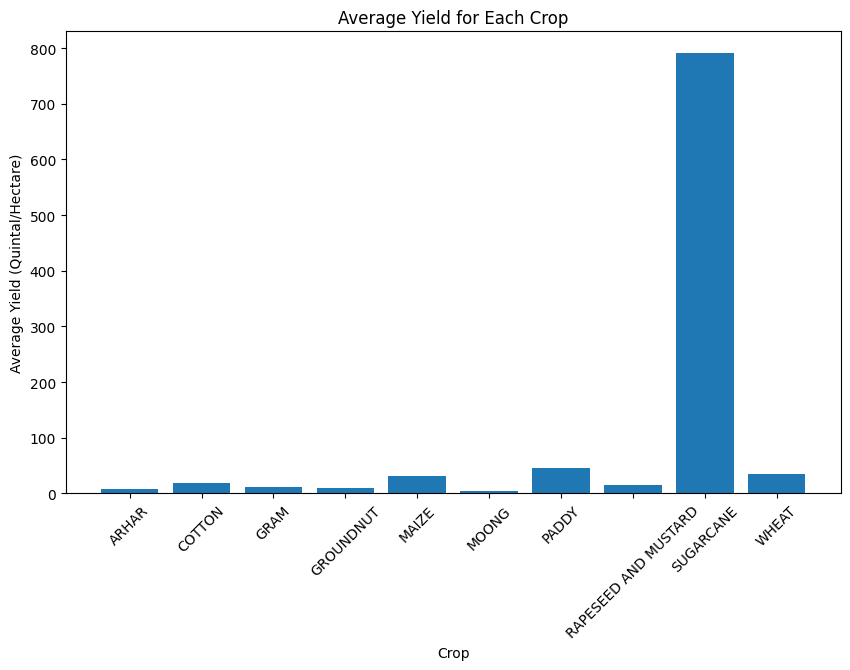

In [25]:
# Calculate the average yield for each crop
average_yield = df.groupby('Crop')['Yield (Quintal/ Hectare) '].mean().reset_index()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.bar(average_yield['Crop'], average_yield['Yield (Quintal/ Hectare) '])
plt.xlabel('Crop')
plt.ylabel('Average Yield (Quintal/Hectare)')
plt.title('Average Yield for Each Crop')
plt.xticks(rotation=45)
plt.show()